In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [3]:
import pandas as pd
from scipy import stats
df = pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

# Group by gender
group_male = df[df['gender'] == 'M']
group_female = df[df['gender'] == 'F']

# Conversion rates
conv_rate_male = group_male['Total_Conversion'].sum() / group_male['Clicks'].sum()
conv_rate_female = group_female['Total_Conversion'].sum() / group_female['Clicks'].sum()

# Cost per conversion for each group
cost_per_conversion_male = group_male['Spent'].sum() / group_male['Total_Conversion'].sum()
cost_per_conversion_female = group_female['Spent'].sum() / group_female['Total_Conversion'].sum()

# Perform a two-sample t-test to compare conversion rates
t_stat, p_value = stats.ttest_ind(group_male['Total_Conversion'], group_female['Total_Conversion'])

# Print results
print(f"Conversion Rate - Male: {conv_rate_male:.2%}, Female: {conv_rate_female:.2%}")
print(f"Cost per Conversion - Male: ${cost_per_conversion_male:.2f}, Female: ${cost_per_conversion_female:.2f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

Conversion Rate - Male: 11.34%, Female: 6.88%
Cost per Conversion - Male: $14.94, Female: $20.99
T-statistic: -0.9313, P-value: 0.3519


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


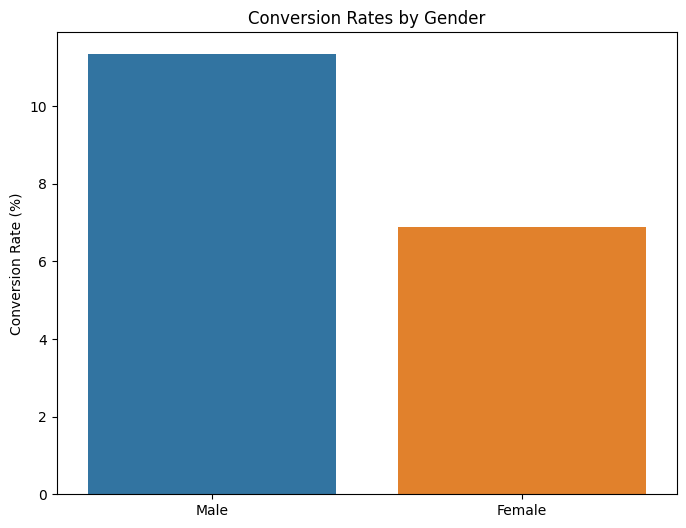

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate conversion rates
conversion_rates = {
    'Male': conv_rate_male * 100,  # Multiply by 100 to show as percentage
    'Female': conv_rate_female * 100
}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(conversion_rates.keys()), y=list(conversion_rates.values()))
plt.title('Conversion Rates by Gender')
plt.ylabel('Conversion Rate (%)')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


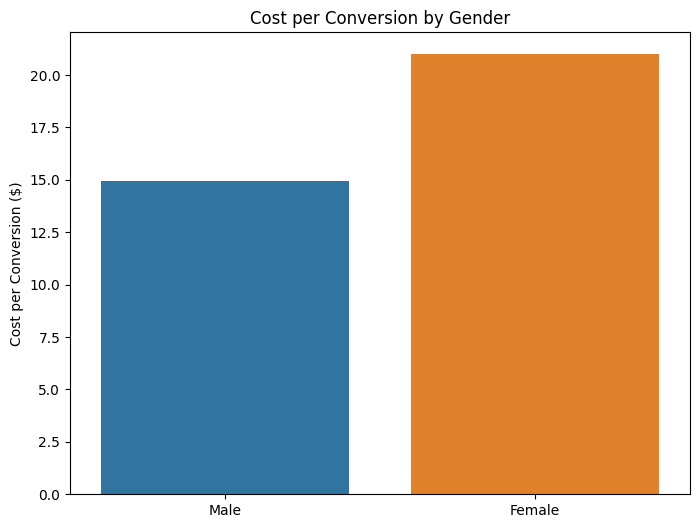

In [5]:
# Cost per conversion
cost_per_conversion = {
    'Male': cost_per_conversion_male,
    'Female': cost_per_conversion_female
}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(cost_per_conversion.keys()), y=list(cost_per_conversion.values()))
plt.title('Cost per Conversion by Gender')
plt.ylabel('Cost per Conversion ($)')
plt.show()


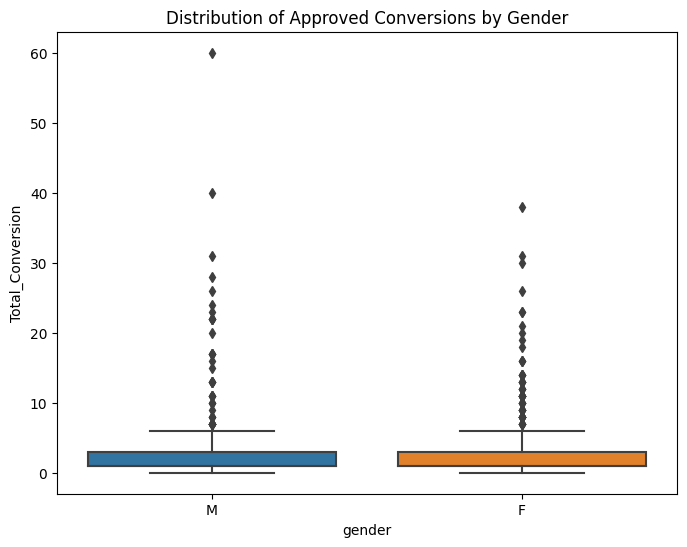

In [8]:
# Combine data for box plot
df_gender = df[['gender', 'Total_Conversion']]

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Total_Conversion', data=df_gender)
plt.title('Distribution of Approved Conversions by Gender')
plt.ylabel('Total_Conversion')
plt.show()


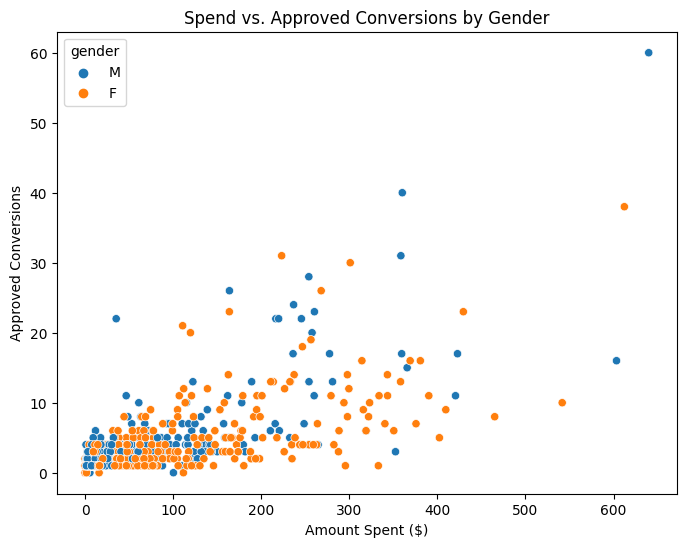

In [10]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Spent', y='Total_Conversion', hue='gender', data=df)
plt.title('Spend vs. Approved Conversions by Gender')
plt.xlabel('Amount Spent ($)')
plt.ylabel('Approved Conversions')
plt.show()

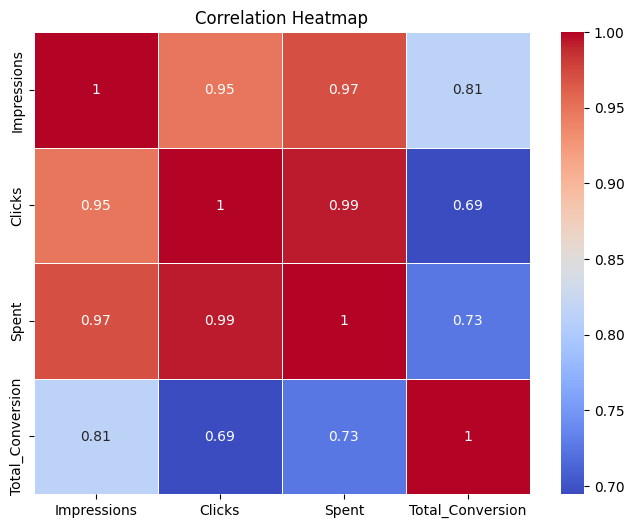

In [11]:
# Correlation matrix
corr_matrix = df[['Impressions', 'Clicks', 'Spent', 'Total_Conversion']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
